In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
df = pd.read_csv('hou_100_done.csv')

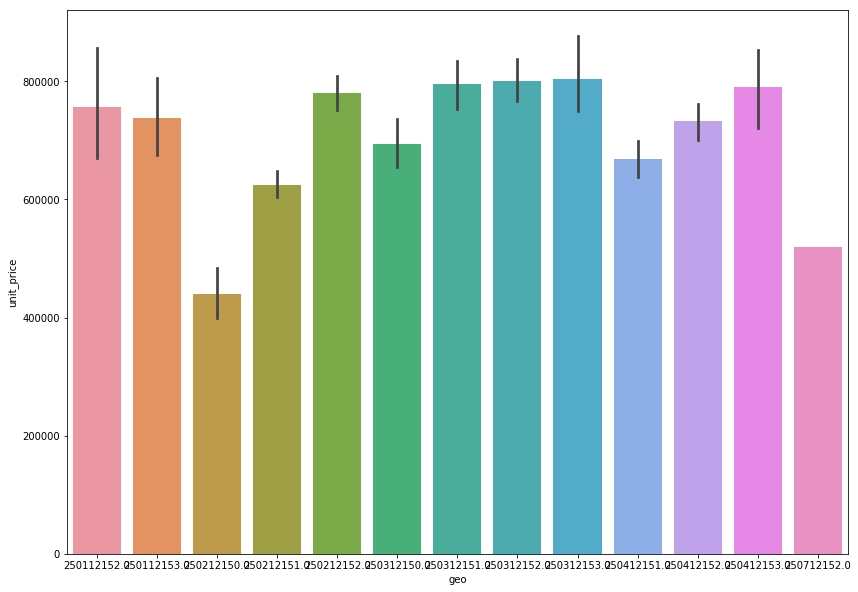

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.barplot(x='geo',y='unit_price',data=df)

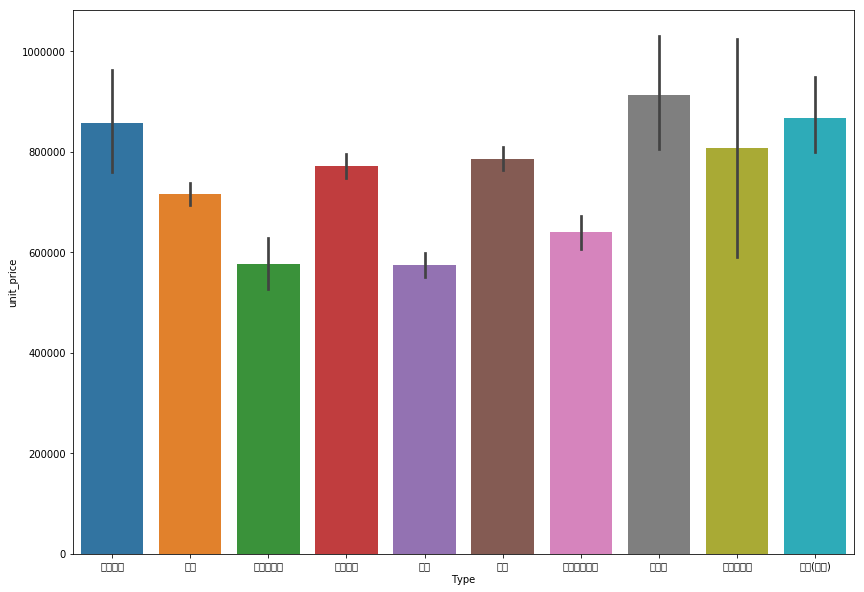

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.barplot(x='Type',y='unit_price',data=df)

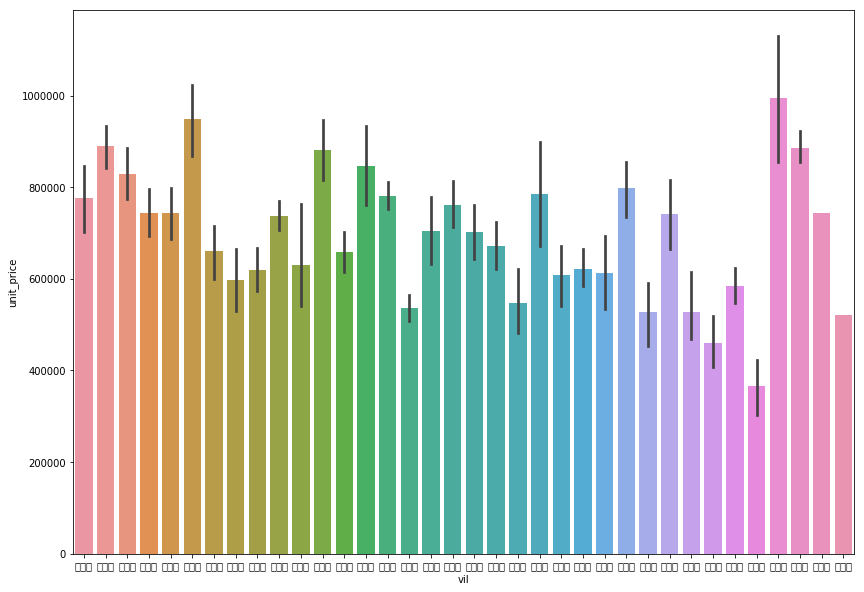

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.barplot(x='vil',y='unit_price',data=df)

In [124]:
# part 6 catagory_tran
def onehotenco(df):
    time = pd.get_dummies(df['Time'],drop_first=True)
    typ = pd.get_dummies(df['Type'],drop_first=True)
    spec = pd.get_dummies(df['special'],drop_first=True)
    c_p = pd.get_dummies(df['car_place'],drop_first=True)
    n = pd.get_dummies(df['neighbor'],drop_first=True)
    mrt = pd.get_dummies(df['mrt'],drop_first=True)
    vil = pd.get_dummies(df['vil'],drop_first=True)
    geo = pd.get_dummies(df['geo'],drop_first=True)
    time = pd.get_dummies(df['Time'],drop_first=True)
    df_n_cat = df.drop(['Time', 'Address', 'Type', 'special','car_place', 'neighbor', 'vil', 'mrt', 'geo', 'lan', 'long'], axis = 1)
    #df = pd.concat([df_n_cat, typ, c_p, n, vil, mrt], axis = 1)
    df = pd.concat([df_n_cat, typ, c_p, n, geo, mrt, spec], axis = 1)
    return df
df = onehotenco(df)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 34 columns):
unit_price     1602 non-null int64
house_area     1602 non-null float64
land_area      1602 non-null float64
house_age      1602 non-null float64
floor          1602 non-null float64
floor_sum      1602 non-null float64
公寓             1602 non-null uint8
多層樓組合          1602 non-null uint8
套房             1602 non-null uint8
店面(店鋪)         1602 non-null uint8
無電梯公寓          1602 non-null uint8
華廈             1602 non-null uint8
辦公商業大樓         1602 non-null uint8
透天厝            1602 non-null uint8
電梯大樓           1602 non-null uint8
無車位            1602 non-null uint8
無社區            1602 non-null uint8
250112153.0    1602 non-null uint8
250212150.0    1602 non-null uint8
250212151.0    1602 non-null uint8
250212152.0    1602 non-null uint8
250312150.0    1602 non-null uint8
250312151.0    1602 non-null uint8
250312152.0    1602 non-null uint8
250312153.0    1602 non-null uint8
25041215

In [126]:
df.head()

,unit_price,house_area,land_area,house_age,floor,floor_sum,公寓,多層樓組合,套房,店面(店鋪),...,250312153.0,250412151.0,250412152.0,250412153.0,250712152.0,近捷運,向政府機關承購之案件,含增建或未登記建物,無,特殊關係間之交易
0,758000,57.88,7.79,19.5,2.0,16.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,925000,12.43,2.16,28.2,4.0,7.0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,913000,41.58,9.34,25.2,4.0,6.0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,481000,18.30,6.13,51.1,2.0,4.0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,856000,50.50,11.73,25.2,5.0,6.0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [127]:
df.corr()['unit_price']

unit_price     1.000000
house_area     0.122703
land_area      0.033155
house_age     -0.439633
floor          0.208056
floor_sum      0.252728
公寓            -0.288666
多層樓組合          0.013098
套房             0.121544
店面(店鋪)         0.114373
無電梯公寓         -0.086486
華廈            -0.002484
辦公商業大樓        -0.082512
透天厝            0.120681
電梯大樓           0.069585
無車位           -0.269554
無社區           -0.249201
250112153.0    0.014005
250212150.0   -0.222339
250212151.0   -0.188047
250212152.0    0.125679
250312150.0   -0.027537
250312151.0    0.095804
250312152.0    0.137340
250312153.0    0.061649
250412151.0   -0.078989
250412152.0    0.018684
250412153.0    0.041277
250712152.0   -0.020538
近捷運            0.291217
向政府機關承購之案件    -0.034353
含增建或未登記建物      0.060294
無              0.144787
特殊關係間之交易      -0.329330
Name: unit_price, dtype: float64

In [128]:
df['unit_price'].describe()

count    1.602000e+03
mean     7.178208e+05
std      2.407936e+05
min      1.310000e+05
25%      5.522500e+05
50%      7.035000e+05
75%      8.645000e+05
max      1.612000e+06
Name: unit_price, dtype: float64

In [129]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
house_area,4.890885e+01
land_area,9.406849e+02
house_age,-6.819376e+03
floor,2.600025e+03
floor_sum,4.380220e+03
公寓,1.784361e+04
多層樓組合,-1.185981e-09
套房,5.042536e+04
店面(店鋪),2.252453e+05
無電梯公寓,5.610200e+04


c:\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


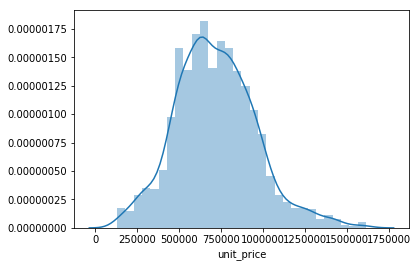

In [130]:
sns.distplot(df['unit_price'],bins=30)

In [100]:
df = df[df['unit_price'] < df['unit_price'].mean() + df['unit_price'].std() * 3]

c:\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


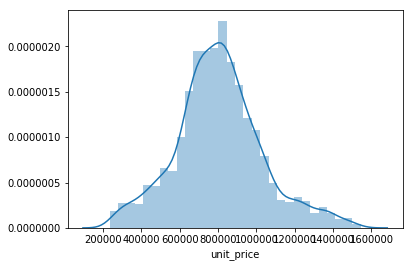

In [101]:
sns.distplot(df['unit_price'],bins=30)

In [131]:
X = df.drop(['unit_price'], axis = 1)
y = df['unit_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=64)

In [132]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

In [133]:
print(lm.intercept_)

821586.3655556203


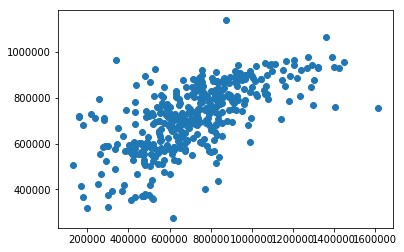

In [134]:
plt.scatter(y_test,predictions)

In [135]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 140910.0876591326
MSE: 36256172960.31937
RMSE: 190410.53794451442


c:\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


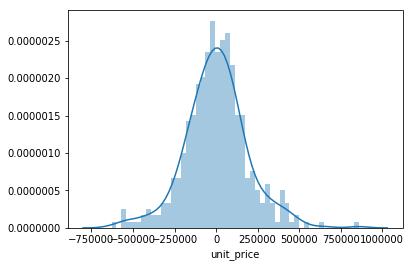

In [136]:
sns.distplot((y_test-predictions),bins=50);

In [137]:
dc = DecisionTreeRegressor()
dc.fit(X_train,y_train)
predictions = dc.predict(X_test)

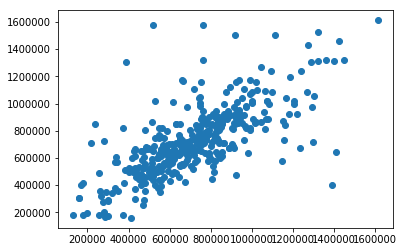

In [138]:
plt.scatter(y_test,predictions)

c:\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


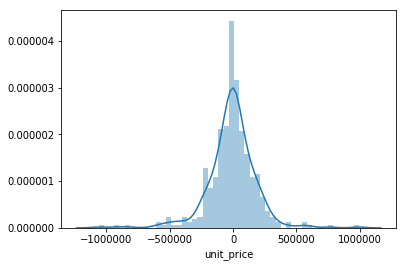

In [139]:
sns.distplot((y_test-predictions),bins=50);

In [140]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 125860.76475477971
MSE: 37119563660.29371
RMSE: 192664.38088108998


In [141]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)

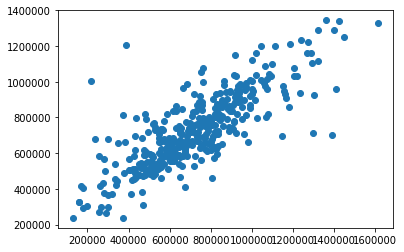

In [142]:
plt.scatter(y_test,predictions)

c:\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


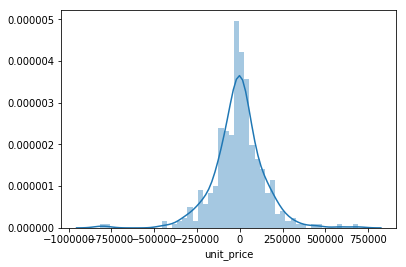

In [143]:
sns.distplot((y_test-predictions),bins=50);

In [144]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 102350.08728179551
MSE: 22448258735.182877
RMSE: 149827.4298490863


In [145]:
dif = y_test-predictions
dif.describe()

count       401.000000
mean      -7518.832086
std      149825.582642
min     -817800.000000
25%      -79500.000000
50%       -4801.666667
75%       60700.000000
max      689000.000000
Name: unit_price, dtype: float64

In [146]:
print(len(dif))
print(len(dif[dif>df['unit_price'].mean()*0.1]))
print(len(dif[dif<-df['unit_price'].mean()*0.1]))

401
85
104
